In [27]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [28]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,NaN,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [29]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	201
float64		column 2	200
float64		column 3	207
float64		column 4	215
float64		column 5	215
float64		column 6	200
float64		column 7	191
float64		column 8	184
float64		column 9	193
float64		column 10	183
float64		column 11	183
float64		column 12	209
float64		column 13	207
float64		column 14	204
float64		column 15	205
float64		column 16	203
float64		column 17	20000


In [30]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,19799.000000,19800.000000,19793.000000,19785.000000,19785.000000,19800.000000,19809.000000,19816.000000,19807.000000,19817.000000,19817.000000,19791.000000,19793.000000,19796.000000,19795.000000,19797.000000,0.0
mean,4.023991,7.033182,5.119739,5.373060,3.503361,6.898586,7.501691,4.626312,5.177311,8.281576,6.454559,7.928806,3.046380,8.338048,3.694115,7.801485,NaN
std,1.913098,3.304222,2.013623,2.260477,2.189353,2.026273,2.326558,2.697761,2.380235,2.487847,2.632513,2.079821,2.334664,1.546710,2.566611,1.616960,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

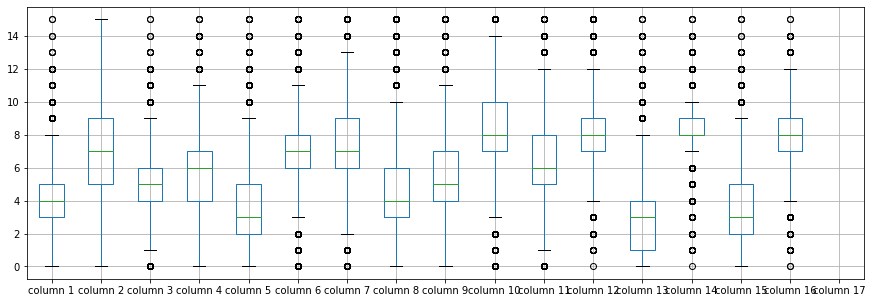

In [31]:
df.boxplot(return_type='axes', figsize=(15,5))

In [32]:
df.mean()

column 1     4.023991
column 2     7.033182
column 3     5.119739
column 4     5.373060
column 5     3.503361
column 6     6.898586
column 7     7.501691
column 8     4.626312
column 9     5.177311
column 10    8.281576
column 11    6.454559
column 12    7.928806
column 13    3.046380
column 14    8.338048
column 15    3.694115
column 16    7.801485
column 17         NaN
dtype: float64

In [33]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.757480,0.851018,0.672582,0.618530,-0.032945,0.044880,0.014178,0.052215,0.147881,0.035792,-0.045403,0.488039,0.098407,0.273354,-0.104680,NaN
column 2,0.757480,1.000000,0.671879,0.822286,0.554156,0.044862,-0.042212,-0.024258,0.094888,0.158986,-0.054286,-0.005748,0.275045,-0.002348,0.230148,-0.043663,NaN
column 3,0.851018,0.671879,1.000000,0.660222,0.766476,0.061200,0.025237,-0.097818,0.057736,0.115645,0.012674,-0.045023,0.556998,0.048236,0.261499,-0.118823,NaN
column 4,0.672582,0.822286,0.660222,1.000000,0.644809,0.042448,-0.020951,0.083867,0.056866,0.010633,-0.012564,0.027134,0.265922,0.024024,0.298600,-0.019718,NaN
column 5,0.618530,0.554156,0.766476,0.644809,1.000000,0.137863,-0.029740,-0.011574,-0.067289,-0.070491,-0.072575,-0.037988,0.627697,0.018572,0.491452,-0.064390,NaN
column 6,-0.032945,0.044862,0.061200,0.042448,0.137863,1.000000,-0.357412,-0.052774,-0.124649,0.088648,-0.341944,-0.033190,0.143303,-0.253133,0.127123,0.250208,NaN
column 7,0.044880,-0.042212,0.025237,-0.020951,-0.029740,-0.357412,1.000000,-0.118986,-0.050307,0.177693,0.600128,-0.272181,-0.037320,0.554501,-0.078800,-0.208968,NaN
column 8,0.014178,-0.024258,-0.097818,0.083867,-0.011574,-0.052774,-0.118986,1.000000,-0.188273,-0.318219,0.040611,0.082686,0.142575,-0.085564,0.005982,0.182558,NaN
column 9,0.052215,0.094888,0.057736,0.056866,-0.067289,-0.124649,-0.050307,-0.188273,1.000000,0.133124,-0.059834,0.118526,-0.385093,-0.051700,0.277010,-0.062224,NaN
column 10,0.147881,0.158986,0.115645,0.010633,-0.070491,0.088648,0.177693,-0.318219,0.133124,1.000000,0.058231,-0.107728,-0.175983,0.028126,-0.087339,-0.115051,NaN


In [34]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [35]:
imputer = md.Midas(layer_structure = [17,17+58,17+58+58,17+58+58+58,17+58+58,17+58,17], vae_layer = False, seed = 580)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 66.26699782714844
Epoch: 1 , loss: 48.311043692016604
Epoch: 2 , loss: 45.03995762023926
Epoch: 3 , loss: 43.61709481201172
Epoch: 4 , loss: 42.99284989929199
Epoch: 5 , loss: 42.36938002166748
Epoch: 6 , loss: 42.1066349029541
Epoch: 7 , loss: 41.774282022094724
Epoch: 8 , loss: 41.684590676879886
Epoch: 9 , loss: 41.41488370666504
Epoch: 10 , loss: 41.254812481689456
Epoch: 11 , loss: 41.077751022338866
Epoch: 12 , loss: 41.08588287811279
Epoch: 13 , loss: 40.812234765625
Epoch: 14 , loss: 40.77002031402588
Epoch: 15 , loss: 40.729515789794924
Epoch: 16 , loss: 40.70953028564453
Epoch: 17 , loss: 40.568276626586915
Epoch: 18 , loss: 40.527260891723635
Epoch: 19 , loss: 40.43306077728271
Epoch: 20 , loss: 40.308481689453124
Epoch: 21 , loss: 40.30254787139893
Epoch: 22 , loss: 40.313432620239254
Epoch: 23 , loss: 40.346251699829104
Epoch: 24 , loss: 40.31328149261475
Epoch: 25 , loss: 40.1647545623779

In [36]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [37]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17    0.016212
Name: 21, dtype: float64

In [38]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [39]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19996,0.0,0.0,0.0,0.0,0.061917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Calculating NRMSE Value

In [40]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [41]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [42]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

146.09363976006645

In [43]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [44]:
NRMS=numerator/denominator
NRMS


0.03912716203260258

In [45]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17     0.010806
Name: 66, dtype: float64

In [46]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.000000,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,0.010034
1,4.0,7.0,5.0,5.0,5.000000,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,0.011697
2,7.0,10.0,8.0,7.0,4.000000,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,0.021339
3,4.0,9.0,5.0,7.0,4.000000,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,0.012577
4,6.0,7.0,8.0,5.0,4.000000,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,0.021384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.000000,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,0.009338
19996,4.0,7.0,6.0,5.0,3.061917,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,0.011312
19997,4.0,8.0,4.0,6.0,4.000000,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,0.005194
19998,4.0,11.0,4.0,8.0,3.000000,0.0,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,0.028173


In [47]:
imputations[-1].to_excel("Letter_C_1(imp).xlsx", index=False, header=False)